In [2]:
# Import necessary packages 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#  import dataset 
traffic_data = pd.read_csv('D:/Downloads/Traffic.csv')
traffic_data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
traffic_data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [6]:
traffic_data.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [7]:
traffic_data['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [8]:
# creates an use-able time variable, by converting the time into a decimal point ranging from 0-23.75
traffic_data['Time'] = pd.to_datetime(traffic_data['Time'], format='%I:%M:%S %p')
traffic_data['Hour'] = traffic_data['Time'].dt.hour
traffic_data['Minute'] = traffic_data['Time'].dt.minute
traffic_data['Second'] = traffic_data['Time'].dt.second

traffic_data = traffic_data.drop('Time', axis=1)

traffic_data['TimeDecimal'] = traffic_data['Hour'] + traffic_data['Minute']/60 + traffic_data['Second']/3600

# Dropped the rest of the variables that aren't useful. I chose to drop day of the week because after experimenting with 
# dummy variables The models were being over fitted.
traffic_data = traffic_data.drop('Date', axis=1)
traffic_data = traffic_data.drop('Hour', axis=1)
traffic_data = traffic_data.drop('Minute', axis=1)
traffic_data = traffic_data.drop('Second', axis=1)      

C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

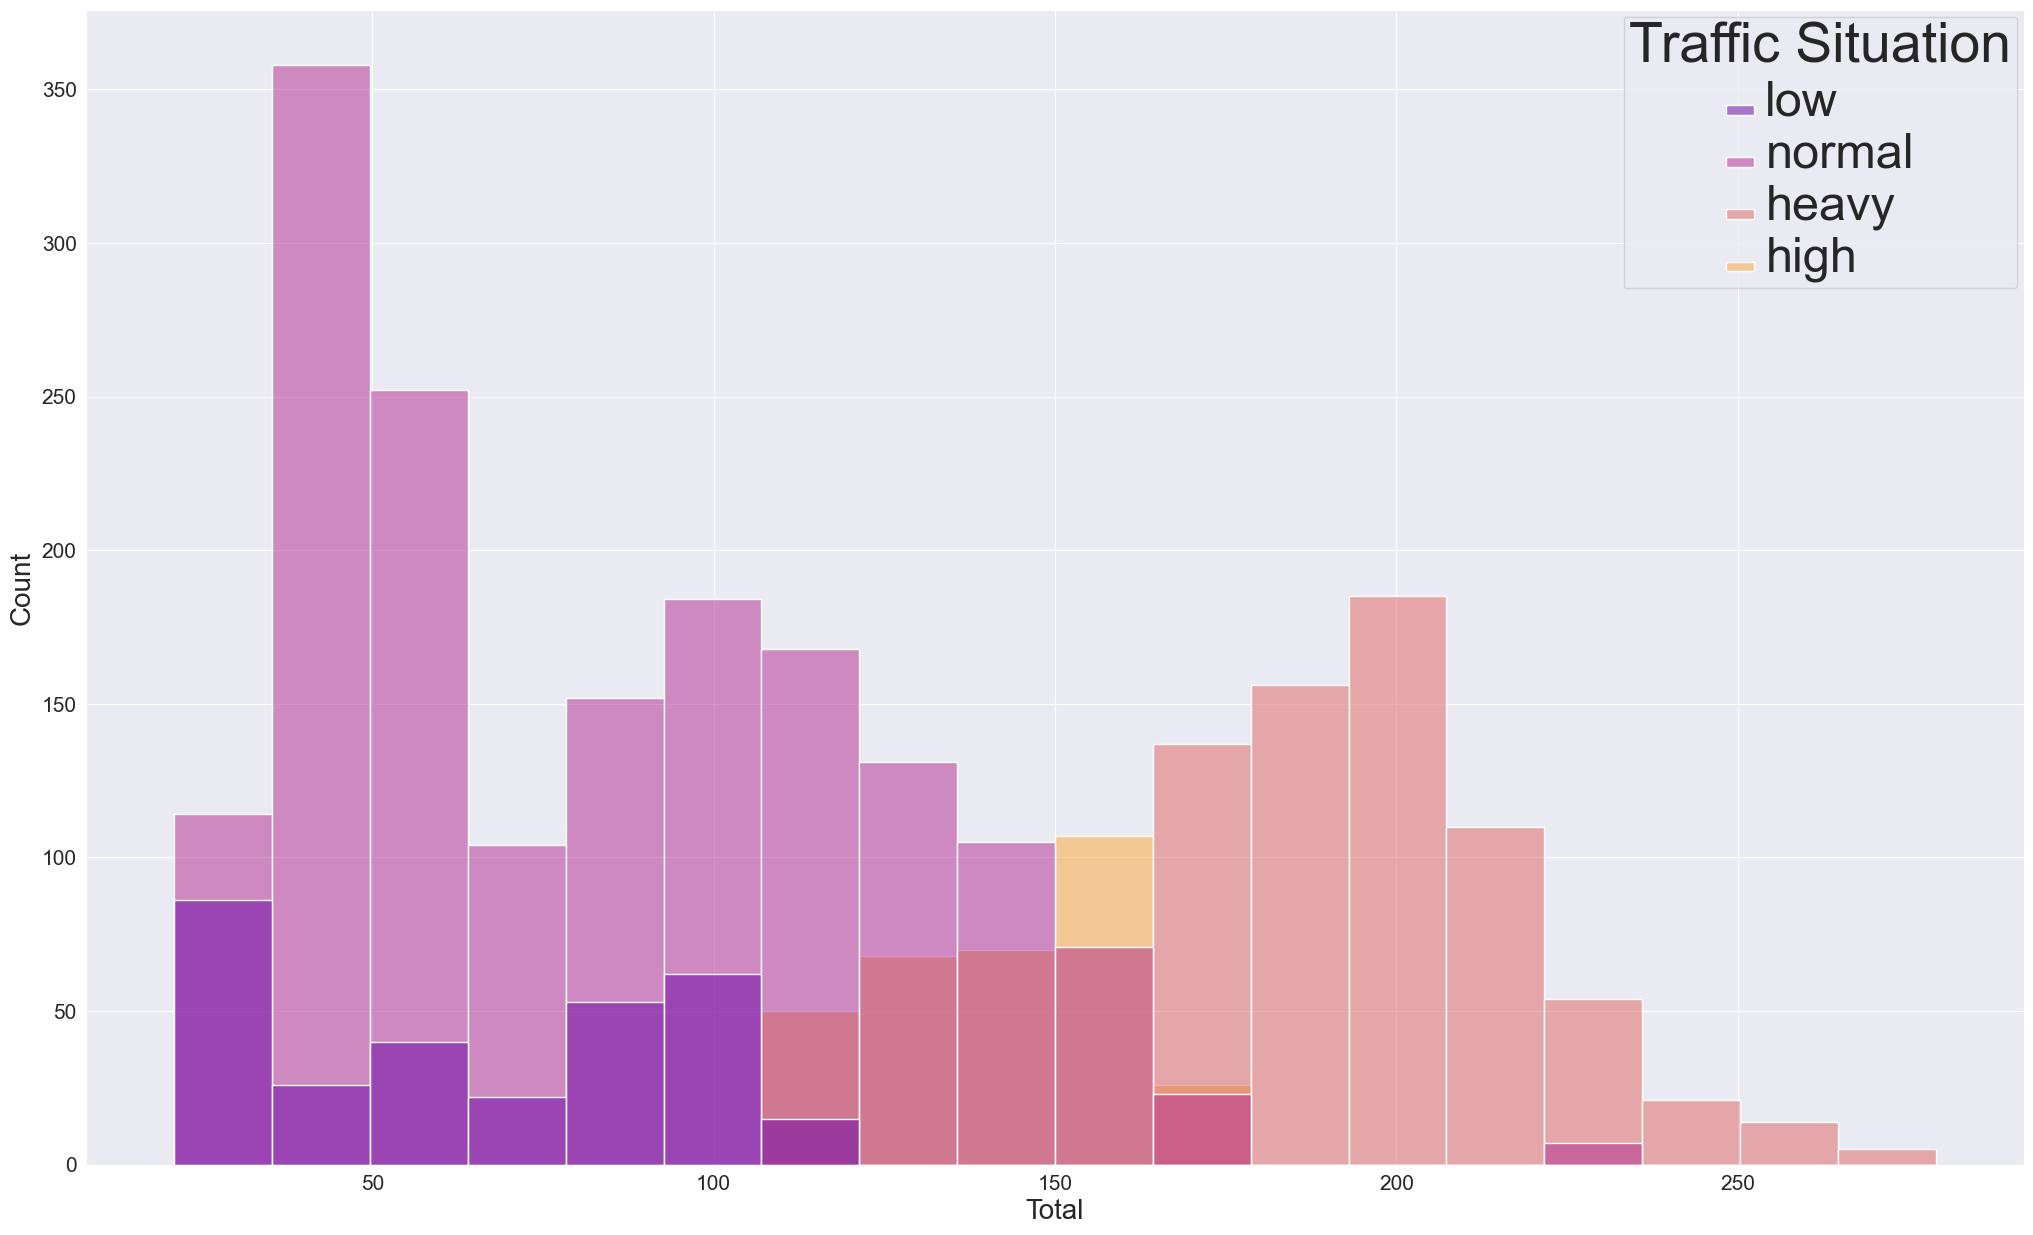

In [9]:
# Histogram of total vehicles, with Traffic situations as the hue
plt.figure(figsize=(25,15))
total_hist = sns.histplot(data=traffic_data,x='Total',hue='Traffic Situation',multiple='layer',palette='plasma')
plt.setp(total_hist.get_legend().get_texts(), fontsize='35')
plt.setp(total_hist.get_legend().get_title(), fontsize='40')
plt.xlabel('Total', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

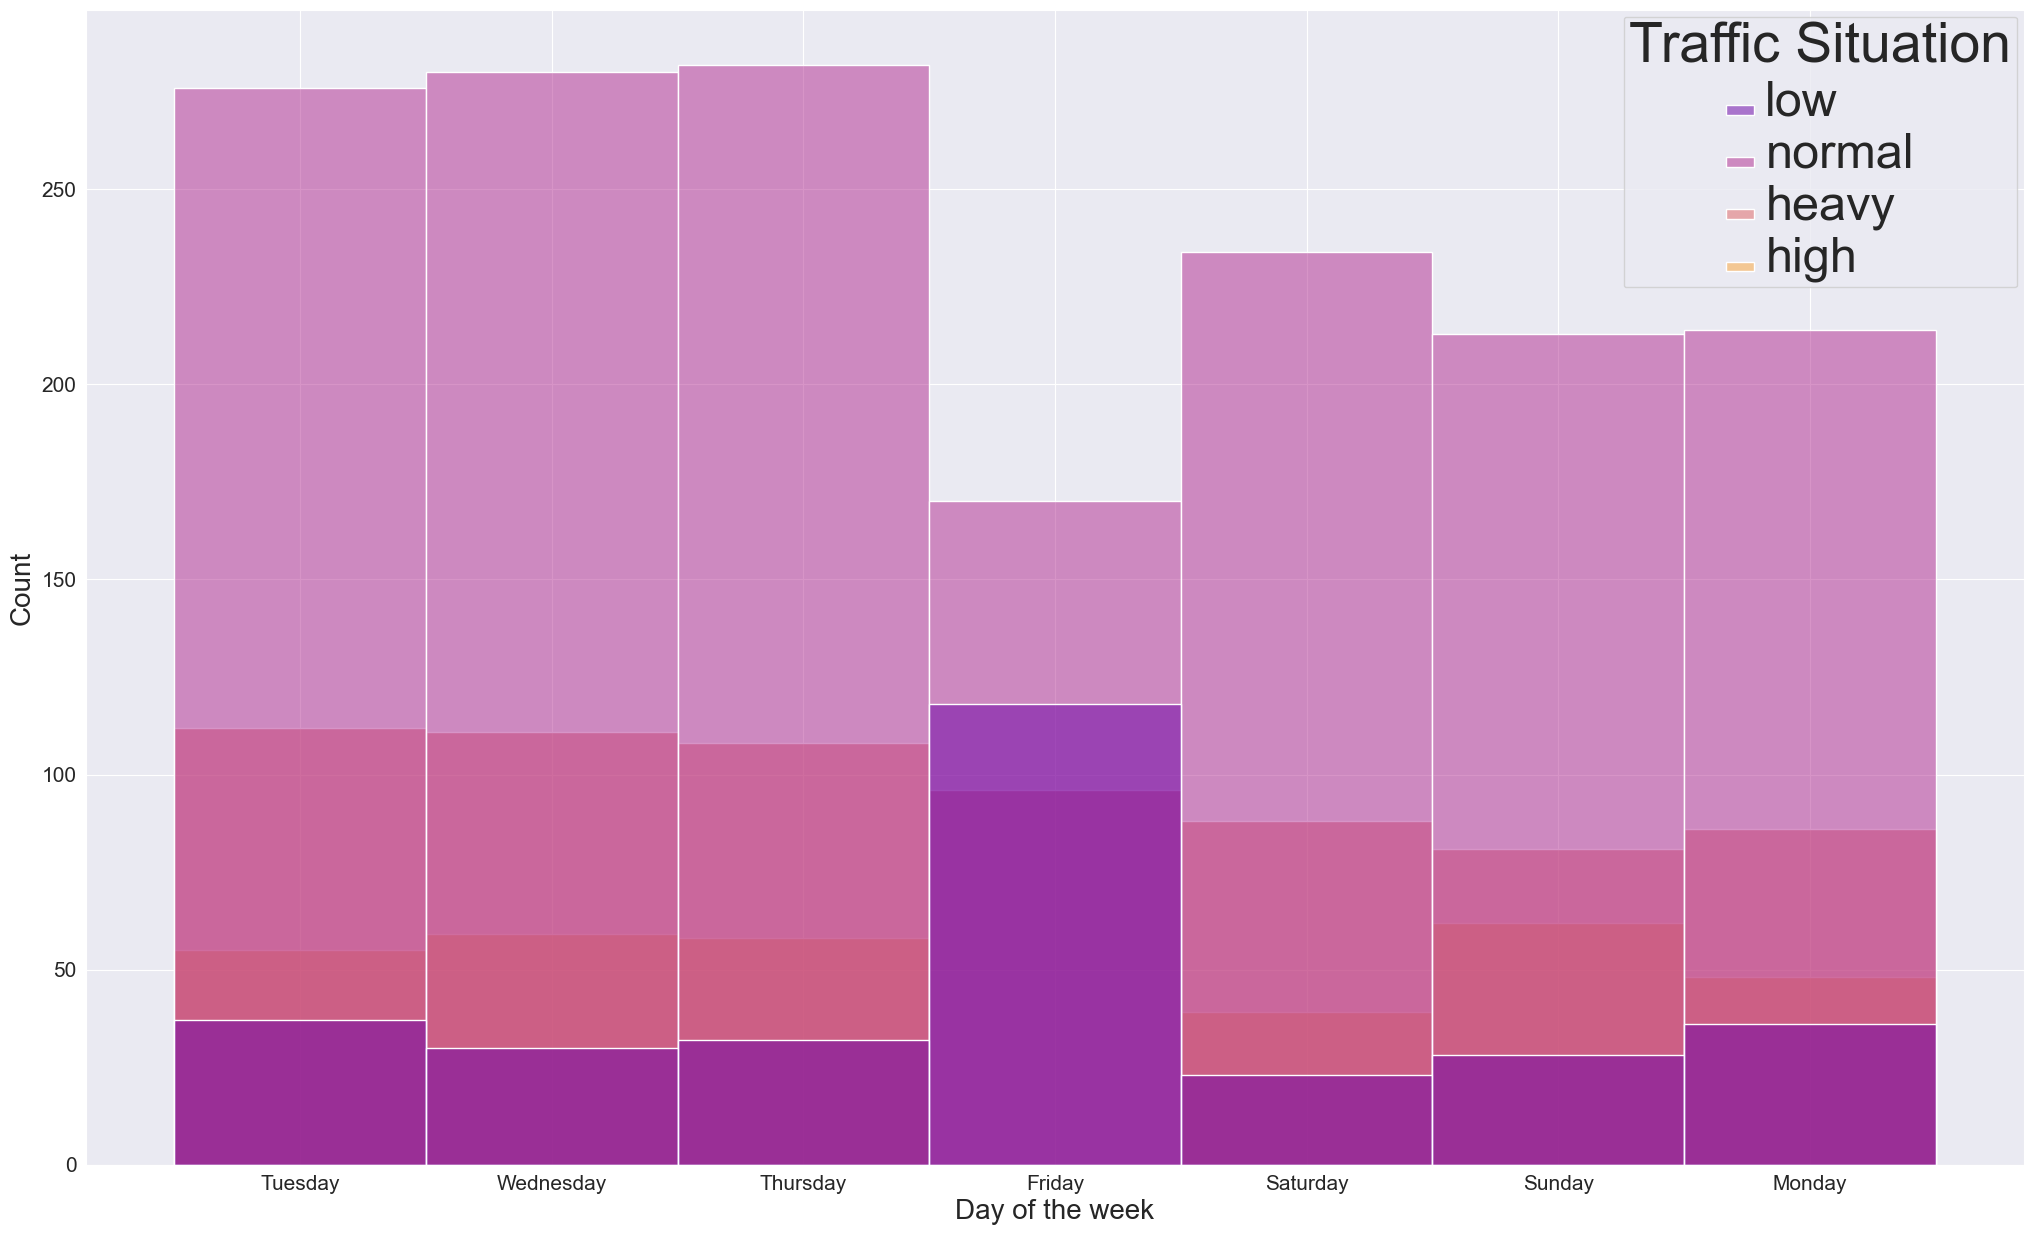

In [10]:
# Histogram of the days of the week, with traffic situation as the hue.
plt.figure(figsize=(25,15))
hist_plot = sns.histplot(data=traffic_data,x='Day of the week', hue='Traffic Situation',multiple='layer',palette='plasma')
plt.setp(hist_plot.get_legend().get_texts(), fontsize='35')
plt.setp(hist_plot.get_legend().get_title(), fontsize='40')
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [11]:
traffic_data = traffic_data.drop('Day of the week',axis=1)

C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

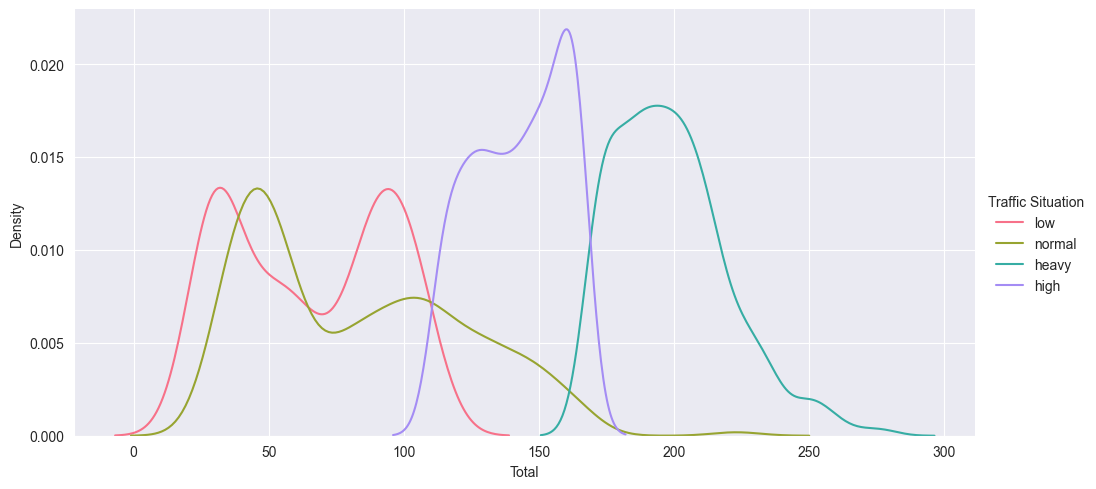

In [12]:
# FacetGrid showing the count of the total vehicles, this graph shows the density. The traffic situation was used as the hue.
g = sns.FacetGrid(traffic_data, hue='Traffic Situation', palette='husl', height=5, aspect=2)
g = g.map(sns.kdeplot, 'Total').add_legend()
plt.show() 

C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

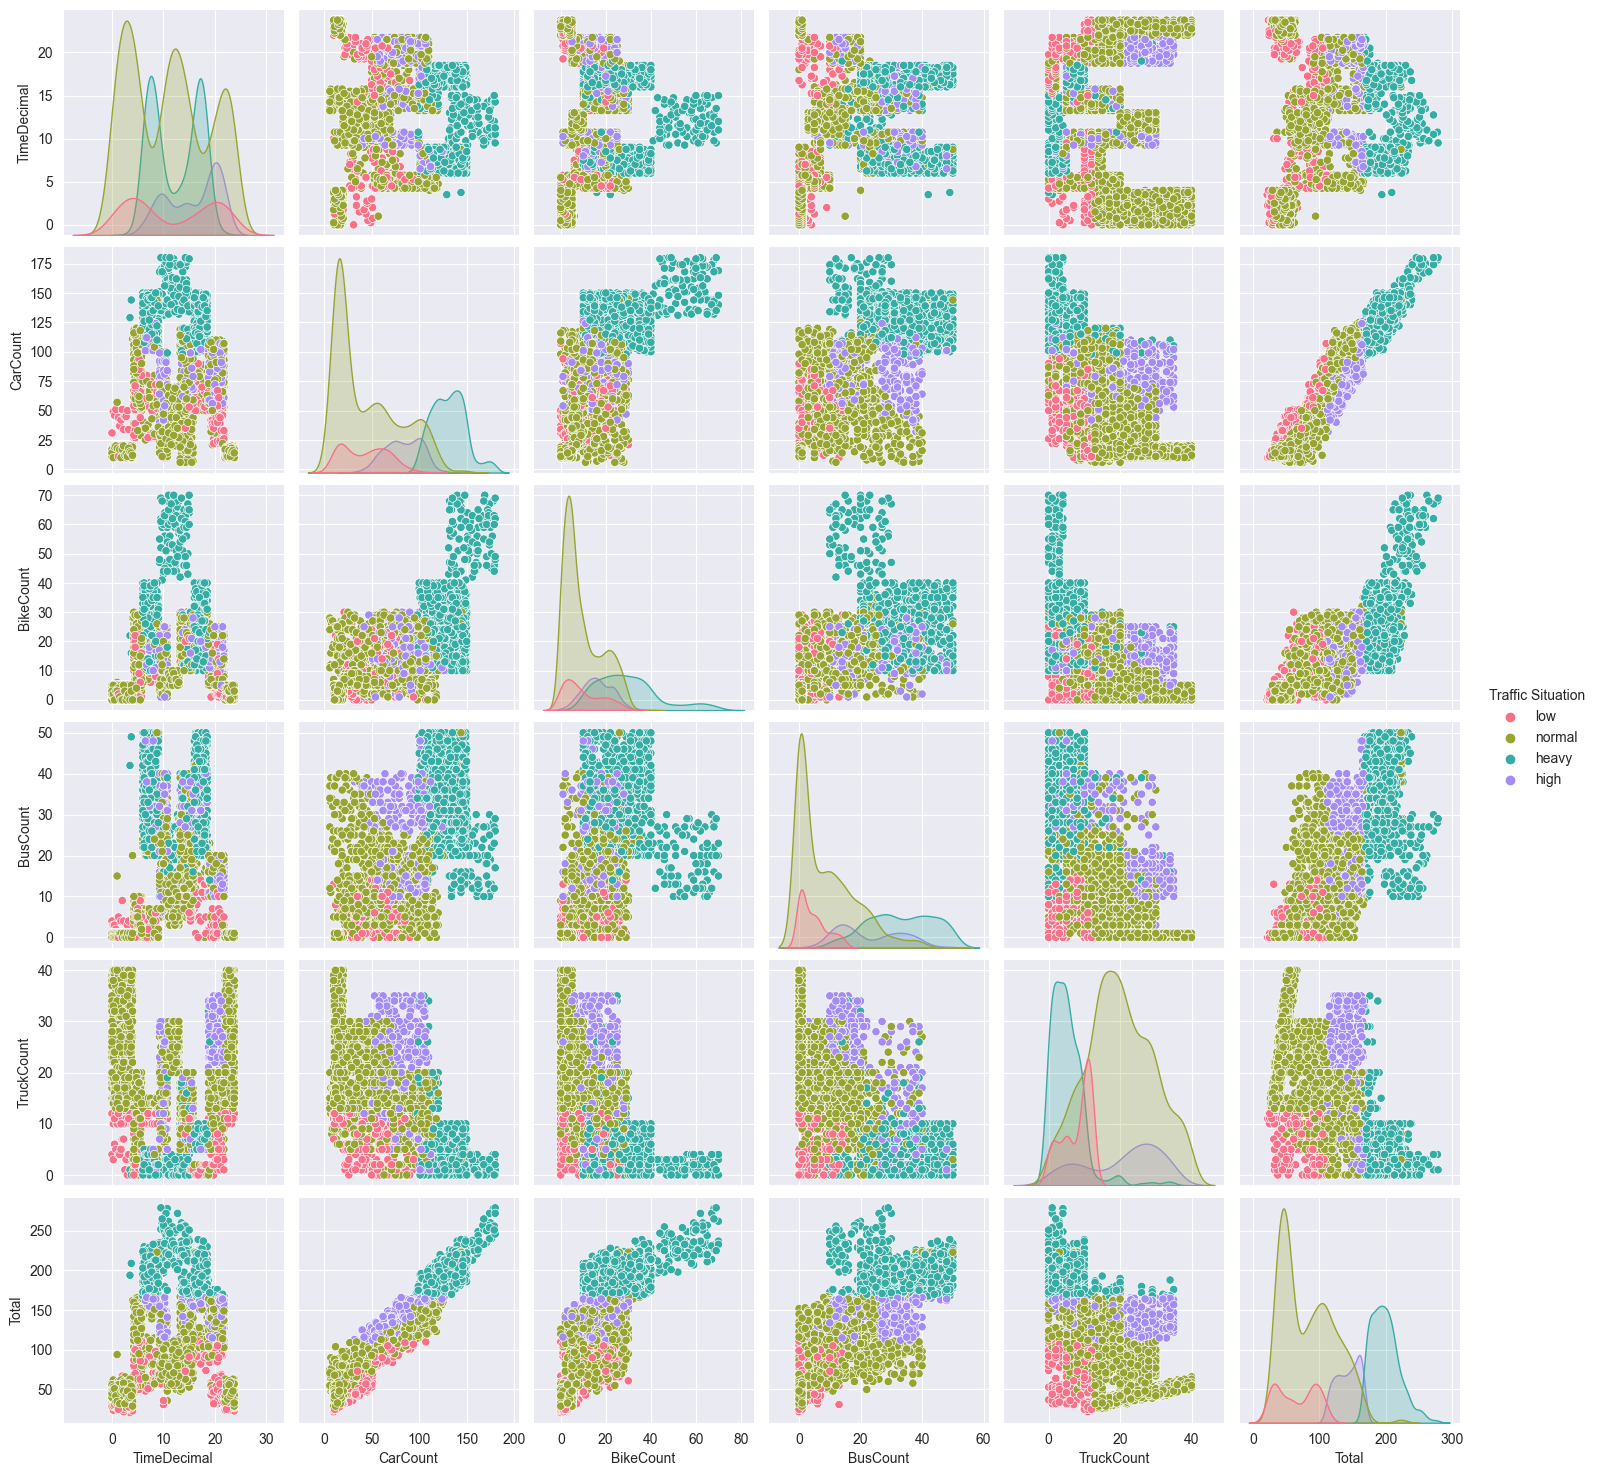

In [13]:
# Pairwise plot showing all the numeric decimal points with traffic situation as the hue.
columns_to_plot = ['TimeDecimal','CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']
sns.pairplot(traffic_data[columns_to_plot], hue='Traffic Situation', palette='husl')
plt.show() 

In [14]:
# Creating the variables I will be using for testing.
X = traffic_data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount','TimeDecimal']].values
Y = traffic_data[['Traffic Situation']].values

In [15]:
# splitting the data using 70:30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [16]:
# opted to use MinMax scaler to scale data
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
X_train = MM.fit_transform(X_train)
X_test = MM.transform(X_test)

In [17]:
# Creating all the models I want to test the data on.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm 

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train.ravel())

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train.ravel())

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train.ravel())

gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
linear.fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
rbf.fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
poly.fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
sig.fit(X_train, y_train.ravel())

SVC(C=1, decision_function_shape='ovo', kernel='sigmoid')

In [18]:
# Running a 5 fold cross validation on each of the models and accessing the average accuracy. 
from sklearn.model_selection import KFold 
k = 5
kf = KFold(n_splits=k)
kf_kn = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_rf = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_lr = cross_val_score(lr, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_gnb = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_linear = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_rbf = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_poly = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
kf_sig = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{kf_kn.mean()}')
print(f' Avg accuracy:{kf_rf.mean()}')
print(f' Avg accuracy:{kf_lr.mean()}')
print(f' Avg accuracy:{kf_gnb.mean()}')
print(f' Avg accuracy:{kf_linear.mean()}')
print(f' Avg accuracy:{kf_rbf.mean()}')
print(f' Avg accuracy:{kf_poly.mean()}')
print(f' Avg accuracy:{kf_sig.mean()}')

 Avg accuracy:0.9399914683637706
 Avg accuracy:0.964949963106438
 Avg accuracy:0.8603002213613724
 Avg accuracy:0.8175901586423169
 Avg accuracy:0.8905471776425014
 Avg accuracy:0.9188710570005533
 Avg accuracy:0.9467130142040213
 Avg accuracy:0.40711353993728094


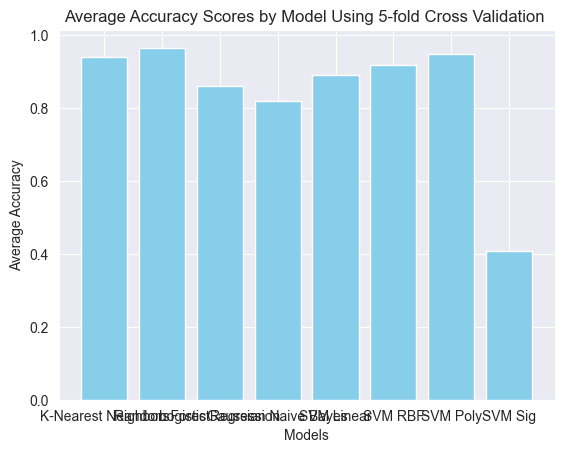

In [19]:
models = ['K-Nearest Neighbors', 'Random Forest', 'Logistic Regression', 'Gaussian Naive Bayes', 'SVM Linear', 'SVM RBF', 'SVM Poly', 'SVM Sig']
avg_accuracies = [kf_kn.mean(), kf_rf.mean(), kf_lr.mean(), kf_gnb.mean(), kf_linear.mean(), kf_rbf.mean(), kf_poly.mean(), kf_sig.mean()]

plt.bar(models, avg_accuracies, color='skyblue')
plt.title('Average Accuracy Scores by Model Using 5-fold Cross Validation ')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.show()

In [20]:
# Running a Stratified k-fold cross validation on each of the models and accessing the average accuracy.
# I gave this one more weight when choosing a model because our target variable was not equal in amounts. 
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)
skf_knn = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_rf = cross_val_score(rf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_lr = cross_val_score(lr, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_gnb = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_linear = cross_val_score(linear, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_rbf = cross_val_score(rbf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_poly = cross_val_score(poly, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
skf_sig = cross_val_score(sig, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{skf_knn.mean()}')
print(f' Avg accuracy:{skf_rf.mean()}')
print(f' Avg accuracy:{skf_lr.mean()}')
print(f' Avg accuracy:{skf_gnb.mean()}')
print(f' Avg accuracy:{skf_linear.mean()}')
print(f' Avg accuracy:{skf_rbf.mean()}')
print(f' Avg accuracy:{skf_poly.mean()}')
print(f' Avg accuracy:{skf_sig.mean()}')

 Avg accuracy:0.9424066065513435
 Avg accuracy:0.9644598822230401
 Avg accuracy:0.8617408906882591
 Avg accuracy:0.8243237026131762
 Avg accuracy:0.893427953625322
 Avg accuracy:0.9212757637099743
 Avg accuracy:0.9515113176297387
 Avg accuracy:0.40569101950680897


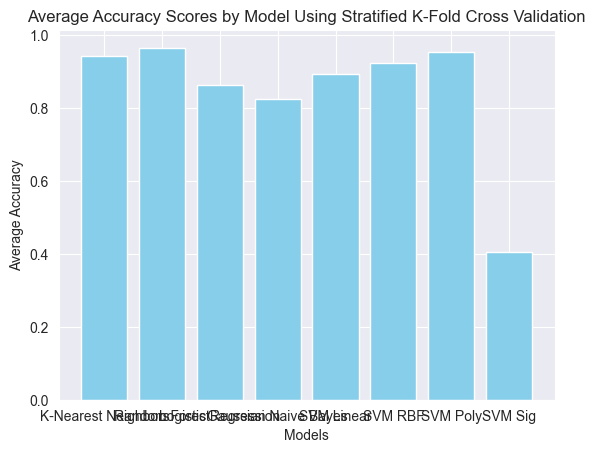

In [21]:
models = ['K-Nearest Neighbors', 'Random Forest', 'Logistic Regression', 'Gaussian Naive Bayes', 'SVM Linear', 'SVM RBF', 'SVM Poly', 'SVM Sig']
avg_accuracies = [skf_knn.mean(), skf_rf.mean(), skf_lr.mean(), skf_gnb.mean(), skf_linear.mean(), skf_rbf.mean(), skf_poly.mean(), skf_sig.mean()]

plt.bar(models, avg_accuracies, color='skyblue')
plt.title('Average Accuracy Scores by Model Using Stratified K-Fold Cross Validation')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.show()

In [22]:
# creating the predicted values used to build the reports. 
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_linear = linear.predict(X_test)
y_pred_rbf = rbf.predict(X_test)
y_pred_poly = poly.predict(X_test)
y_pred_sig = sig.predict(X_test)

C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jimmy\Desktop\Programs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

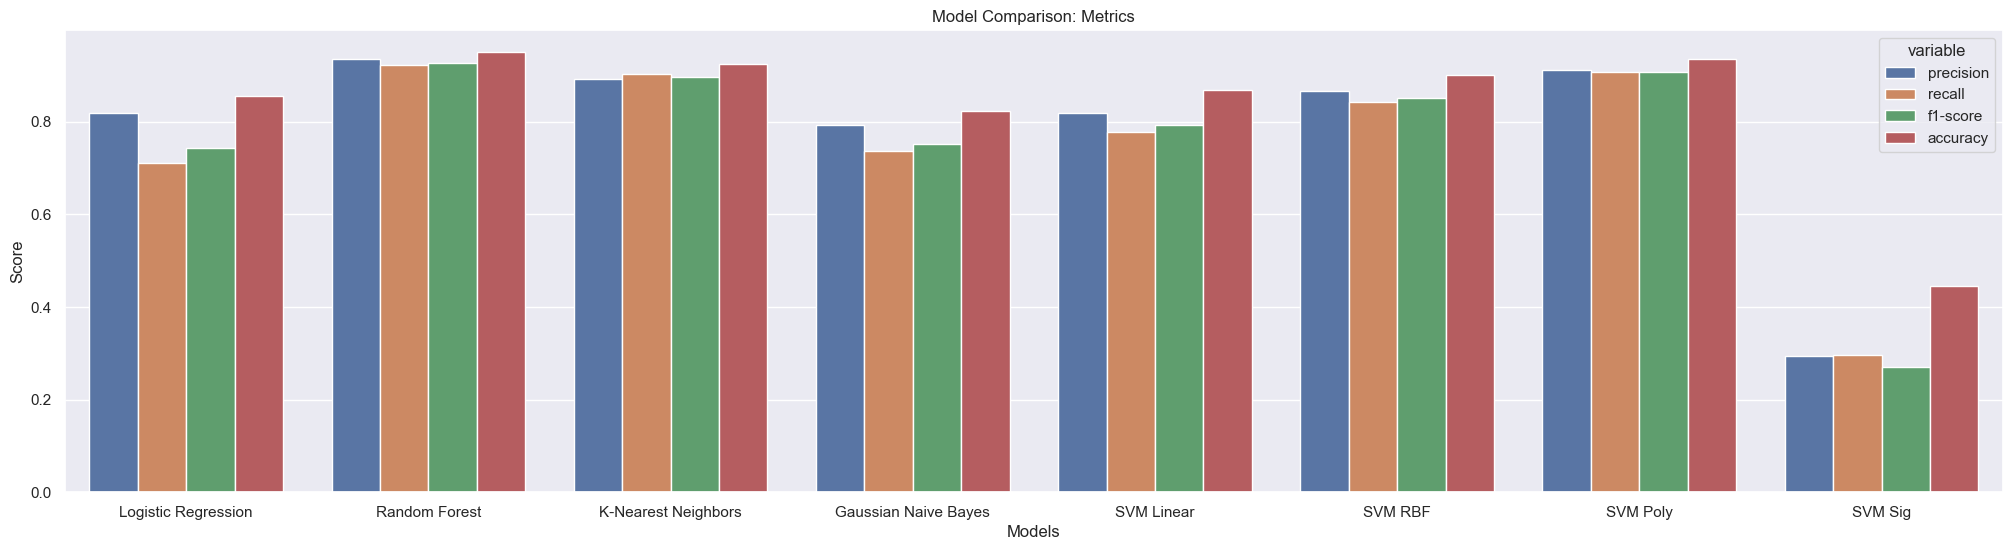

In [36]:
# This creates all of the classification reports as well as creates the plot showing
# the accuracy, precision, f1-score, and recall scores. This compares all of the models. 
from sklearn.metrics import classification_report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_gnb = classification_report(y_test, y_pred_gnb, output_dict=True)
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)
report_poly = classification_report(y_test, y_pred_poly, output_dict=True)
report_sig = classification_report(y_test, y_pred_sig, output_dict=True)

# Formatting each report into a DataFrame
data_lr = pd.DataFrame(report_lr).transpose()
data_rf = pd.DataFrame(report_rf).transpose()
data_knn = pd.DataFrame(report_knn).transpose()
data_gnb = pd.DataFrame(report_gnb).transpose()
data_linear = pd.DataFrame(report_linear).transpose()
data_rbf = pd.DataFrame(report_rbf).transpose()
data_poly = pd.DataFrame(report_poly).transpose()
data_sig = pd.DataFrame(report_sig).transpose()

data = pd.DataFrame({
    'Logistic Regression': [data_lr.loc['macro avg', 'precision'], data_lr.loc['macro avg', 'recall'], data_lr.loc['macro avg', 'f1-score'], data_lr.loc['accuracy', 'support']],
    'Random Forest': [data_rf.loc['macro avg', 'precision'], data_rf.loc['macro avg', 'recall'], data_rf.loc['macro avg', 'f1-score'], data_rf.loc['accuracy', 'support']],
    'K-Nearest Neighbors': [data_knn.loc['macro avg', 'precision'], data_knn.loc['macro avg', 'recall'], data_knn.loc['macro avg', 'f1-score'], data_knn.loc['accuracy', 'support']],
    'Gaussian Naive Bayes': [data_gnb.loc['macro avg', 'precision'], data_gnb.loc['macro avg', 'recall'], data_gnb.loc['macro avg', 'f1-score'], data_gnb.loc['accuracy', 'support']],
    'SVM Linear': [data_linear.loc['macro avg', 'precision'], data_linear.loc['macro avg', 'recall'], data_linear.loc['macro avg', 'f1-score'], data_linear.loc['accuracy', 'support']],
    'SVM RBF': [data_rbf.loc['macro avg', 'precision'], data_rbf.loc['macro avg', 'recall'], data_rbf.loc['macro avg', 'f1-score'], data_rbf.loc['accuracy', 'support']],
    'SVM Poly': [data_poly.loc['macro avg', 'precision'], data_poly.loc['macro avg', 'recall'], data_poly.loc['macro avg', 'f1-score'], data_poly.loc['accuracy', 'support']],
    'SVM Sig': [data_sig.loc['macro avg', 'precision'], data_sig.loc['macro avg', 'recall'], data_sig.loc['macro avg', 'f1-score'], data_sig.loc['accuracy', 'support']],
}).transpose()

# Assign appropriate column names
data.columns = ['precision', 'recall', 'f1-score', 'accuracy']

data_melted = data.reset_index().melt(id_vars='index')

# Barplot of the data
sns.barplot(x='index', y='value', hue='variable', data=data_melted)
sns.set(rc={'figure.figsize':(25,6)}) 
plt.title('Model Comparison: Metrics')
plt.xlabel('Models')
plt.ylabel('Score')

plt.show()

In [24]:
# Classification report for logistic regression
data_lr

,precision,recall,f1-score,support
heavy,0.849558,0.955224,0.899297,201.000000
high,0.777778,0.510417,0.616352,96.000000
low,0.777778,0.426829,0.551181,82.000000
normal,0.871199,0.947471,0.907735,514.000000
accuracy,0.854423,0.854423,0.854423,0.854423
macro avg,0.819078,0.709985,0.743642,893.000000
weighted avg,0.847706,0.854423,0.841771,893.000000


In [25]:
# Classification report for random forest
data_rf

,precision,recall,f1-score,support
heavy,0.915094,0.965174,0.939467,201.000000
high,0.900000,0.750000,0.818182,96.000000
low,0.953488,1.000000,0.976190,82.000000
normal,0.970874,0.972763,0.971817,514.000000
accuracy,0.949608,0.949608,0.949608,0.949608
macro avg,0.934864,0.921984,0.926414,893.000000
weighted avg,0.949103,0.949608,0.948421,893.000000


In [26]:
# Classification report for GaussianNB
data_gnb

,precision,recall,f1-score,support
heavy,0.827586,0.955224,0.886836,201.000000
high,0.457944,0.510417,0.482759,96.000000
low,1.000000,0.621951,0.766917,82.000000
normal,0.880716,0.861868,0.871190,514.000000
accuracy,0.823068,0.823068,0.823068,0.823068
macro avg,0.791561,0.737365,0.751925,893.000000
weighted avg,0.834261,0.823068,0.823379,893.000000


In [27]:
# Classification for k nearest neighbors
data_knn

,precision,recall,f1-score,support
heavy,0.891509,0.940299,0.915254,201.000000
high,0.903614,0.781250,0.837989,96.000000
low,0.812500,0.951220,0.876404,82.000000
normal,0.964143,0.941634,0.952756,514.000000
accuracy,0.924972,0.924972,0.924972,0.924972
macro avg,0.892942,0.903601,0.895601,893.000000
weighted avg,0.927363,0.924972,0.924966,893.000000


In [28]:
# Classification for Support vector machine using a linear kernel
data_linear

,precision,recall,f1-score,support
heavy,0.851528,0.970149,0.906977,201.000000
high,0.773333,0.604167,0.678363,96.000000
low,0.739130,0.621951,0.675497,82.000000
normal,0.905769,0.916342,0.911025,514.000000
accuracy,0.867861,0.867861,0.867861,0.867861
macro avg,0.817440,0.778152,0.792965,893.000000
weighted avg,0.864022,0.867861,0.863475,893.000000


In [29]:
# Classification for Support vector machine using a rbf kernel
data_rbf

,precision,recall,f1-score,support
heavy,0.877828,0.965174,0.919431,201.000000
high,0.842105,0.666667,0.744186,96.000000
low,0.804878,0.804878,0.804878,82.000000
normal,0.935798,0.935798,0.935798,514.000000
accuracy,0.901456,0.901456,0.901456,0.901456
macro avg,0.865152,0.843129,0.851073,893.000000
weighted avg,0.900656,0.901456,0.899493,893.000000


In [30]:
# Classification for Support vector machine using a poly kernel
data_poly   

,precision,recall,f1-score,support
heavy,0.966019,0.990050,0.977887,201.00000
high,0.940476,0.822917,0.877778,96.00000
low,0.788889,0.865854,0.825581,82.00000
normal,0.947368,0.945525,0.946446,514.00000
accuracy,0.935050,0.935050,0.935050,0.93505
macro avg,0.910688,0.906086,0.906923,893.00000
weighted avg,0.936273,0.935050,0.935042,893.00000


In [31]:
# Classification for Support vector machine using a sig kernel
data_sig

,precision,recall,f1-score,support
heavy,0.332512,0.671642,0.444811,201.000000
high,0.000000,0.000000,0.000000,96.000000
low,0.000000,0.000000,0.000000,82.000000
normal,0.845659,0.511673,0.637576,514.000000
accuracy,0.445689,0.445689,0.445689,0.445689
macro avg,0.294543,0.295829,0.270597,893.000000
weighted avg,0.561594,0.445689,0.467101,893.000000


In [32]:
# exporting the necessary files to deploy on the website
import pickle

with open('random_forest_classification.pkl', 'wb') as file:
    pickle.dump(rf, file)
    
with open('mm.pkl', 'wb') as file:
    pickle.dump(MM, file)